## Defining the Atmosphere

In archNEMESIS, the atmospheric structure and composition is defined using the Atmosphere class. In this notebook, we aim to provide a tutorial of the several functionalities of this class, including reading/writing the input files for running retrievals and forward models or just performing useful calculations for the post-processing of the retrievals.

In [1]:
import archnemesis as ans
import numpy as np
import matplotlib.pyplot as plt

/home/stem/ja22256/Documents/Projects/venv_planetary_python3.11/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-08-12 15:39:49,778	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


## 1. Reading and writing the input files

The methods within the Atmosphere class can be used to read/write the information from/to the NEMESIS and archNEMESIS input files. In particular, in a NEMESIS run the atmospheric information is defined in the *.ref* and *aerosol.ref* files, while in an archNEMESIS run the atmospheric information is defined in the common HDF5 file.  

**NOTE**: For historical reasons, the units of the aerosols in NEMESIS are defined in particles per gram of atmosphere. On the other hand, the Atmosphere class works using SI units and the aerosols are defined in particles per cubic metre. However, in order to keep the file convention consistent, the *.ref* and *aerosol.ref* files are read with the units in NEMESIS, and a unit conversion is performed internally when using the reading/writing routines. Nevertheless, since there is a density factor between the two, note that the atmospheric density needs to be defined prior to reading the aerosol file.

### Reading the information from the NEMESIS files

First of all, we are going to read the information from the NEMESIS *.ref* and *aerosol.ref* files and make a summary plot based on the information in these files.

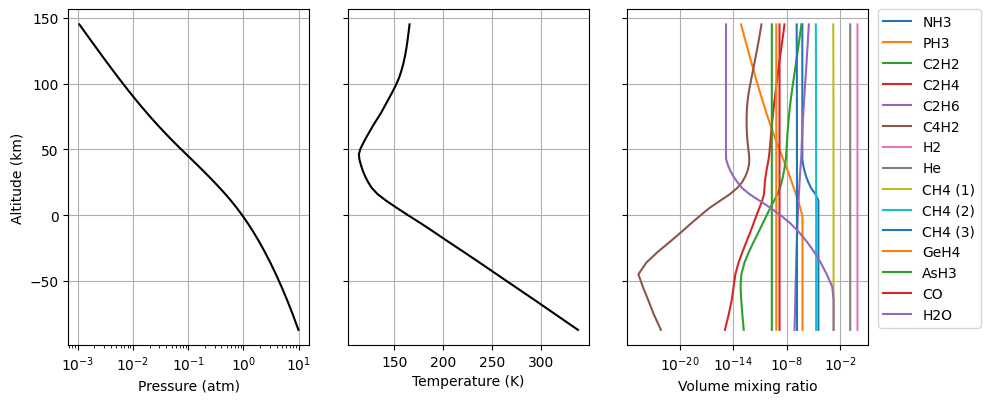

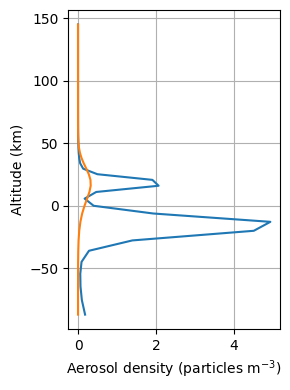

In [2]:
#Initialising the Atmosphere class
Atmosphere = ans.Atmosphere_0(runname='jupiter')

#Reading the .ref file
Atmosphere.read_ref()

#Making summary plot of the gaseous atmosphere
Atmosphere.plot_Atm()

#Reading the aerosol.ref file (units in file in particles per gram of atm, but units in class of particles m-3)
Atmosphere.read_aerosol()

#Making summary plot of the aerosols in the atmosphere
Atmosphere.plot_Dust()

### Writing the information into the NEMESIS files

Similarly, we can use the methods in the Atmosphere class to write the information into files with the format NEMESIS requires (i.e., the specific format of the *.ref* and *aerosol.ref* files).

**NOTE**: Following the explanation in the previous section, there is also an internal conversion of the units from particles per m$^3$ (archNEMESIS units) to particles per gram of atmosphere (NEMESIS units), so that the *aerosol.ref* file has the units it requires. Similarly, the units of pressure are also converted from Pa (archNEMESIS units) to atm (NEMESIS units) when writing the *.ref* file.

In [3]:
#Writing the .ref file
Atmosphere.write_ref()

#Wiring the aerosol.ref file (units in file in particles per gram of atm, but units in class of particles m-3)
Atmosphere.write_aerosol()

### Reading and writing the information into the archNEMESIS HDF5 file

In archNEMESIS, the format of the input files was updated with respect to NEMESIS so that a unique file is required for running a retrieval or forward model. In particular, the information is included in an HDF5 file where one of the sections of the files (the Atmosphere section) corresponds to the information in the Atmosphere class. We can use the built-in functions within this class to read/write the information into this HDF5 file. 

In [4]:
#Initialising Atmosphere class
Atmosphere = ans.Atmosphere_0()

#Reading the input HDF5 file
Atmosphere.read_hdf5('mars')

#Printing some summary information about the class to the screen
Atmosphere.summary_info()

#Writing the file into HDF5 file
Atmosphere.write_hdf5('mars')

Planet :: Mars
Number of profiles ::  1
Latitude of profiles ::  80.833
Number of altitude points ::  72
Minimum/maximum heights (km) ::  3.424995893212533 130.01110323793642
Maximum/minimum pressure (atm) ::  0.003644059654403374 6.430470874101519e-10
Maximum/minimum temperature (K) 184.94036865234375 131.26361083984375
Maximum/minimum gravity (m/s2) ::  3.73 3.47
Maximum/minimum molecular weight ::  0.04365860339841797 0.04249212487703371
Number of gaseous species ::  15
Gaseous species ::  ['CO2', 'O3', 'CO', 'O2', 'N2', 'H2', 'O', 'H', 'Ar', 'H2O (1)', 'H2O (2)', 'H2O (3)', 'H2O (4)', 'H2O (5)', 'HO2']
Number of aerosol populations ::  1


## 2. Modifying the gaseous Atmosphere

In addition to having methods relevant to read/write the input files, there are also some built-in methods to modify the parameters in the atmosphere. These methods make sure that the dimensions of the arrays and other things are all consistent, giving some errors back otherwise, but note that it is also easy to modify the information in the class just by calling it as Atmosphere.*VARIABLE*. 

### Add a new gas in the atmosphere

In [5]:
#Add OH in the atmosphere
ID_oh = 13                                  #Radtran ID for OH
ISO_oh = 0                                  #Radtran isotope ID (0 for all isotopes)
vmr_oh = np.ones(Atmosphere.NP) * 1.0e-9    #1 ppbv of OH (constant with altitude)

Atmosphere.add_gas(ID_oh,ISO_oh,vmr_oh)     

### Remove gas from the atmosphere

In [6]:
#Remove the fifth isotope of water
ID_h2o = 1
ISO_h2o = 5

Atmosphere.remove_gas(ID_h2o,ISO_h2o)

### Update volume mixing ratio of gas in the atmosphere

In [7]:
#We want to update the VMR of Ar
ID_Ar = 76                                  #Radtran ID for Ar
ISO_Ar = 0                                  #Radtran isotope ID (0 for all isotopes)
vmr_Ar = np.ones(Atmosphere.NP) * 0.01      

Atmosphere.update_gas(ID_Ar,ISO_Ar,vmr_Ar)

### Re-adjust altitudes based on hydrostatic equilibrium

Using the function Atmosphere.*adjust_hydrostatH()* we will keep the pressure levels in the atmosphere fixed and re-compute the altitudes based on the hydrostatic equation. The altitudes are re-computed with respect to the altitude level that is closest to 0 km.

In [8]:
#Saving array before the re-adjustment
h_before = Atmosphere.H/1.0e3
 
#Re-calculate altitude levels based on hydrostatic equilibrium equation (fixing pressure levels)
Atmosphere.adjust_hydrostatH()

#Saving results after re-adjustment
h_after = Atmosphere.H/1.0e3

#Printing the results
print('P (bar),','H_before (km),','H_after (km)')
#for i in range(Atmosphere.NP):
for i in range(10):
    print(Atmosphere.P[i]/1.0e5,h_before[i]/1.0e3,h_after[i]/1.0e3)


P (bar), H_before (km), H_after (km)
0.003692343444824219 0.0034249958932125327 0.0034249958932125327
0.00247947998046875 0.006422610045284344 0.00641187652068918
0.001654933319091797 0.009428527090137006 0.009405243928353273
0.0013440388488769532 0.010950178536527432 0.010922596254164332
0.001088509826660156 0.012471829982917857 0.012442441841737706
0.0008802003479003906 0.013994307152503492 0.013956756977455895
0.0007102473449707032 0.015515958598893919 0.015470969664982365
0.0005719057846069336 0.017037610045284347 0.01698640293074029
0.0003315441131591797 0.020813390107650834 0.020751559770359918
0.00019087339401245118 0.024593344446822107 0.02451974301290332


### Re-adjust the pressures based on the hydrostatic equilibrium equation

Using the function Atmosphere.*adjust_hydrostatP()* we can fix the altitude levels in the atmosphere and re-compute the pressure levels. The reference pressure at a given tangent height must be defined, and the rest of the pressure levels are re-computed with respect to this.

In [9]:
#Saving the pressure array before computations
p_before = Atmosphere.P

#Performing the calculations
htan = 12442.    #Altitude at which to fix the pressure (m)
ptan = 1.0e+02   #Pressure at htan (Pa)
Atmosphere.adjust_hydrostatP(htan,ptan)
p_after = Atmosphere.P

#Printing the results
print('H (km),','P_before (Pa),','P_after (Pa)')
#for i in range(Atmosphere.NP):
for i in range(10):
    print(Atmosphere.H[i]/1.0e3,p_before[i],p_after[i])

H (km), P_before (Pa), P_after (Pa)
3.424995893212533 369.2343444824219 339.1940951180041
6.411876520689179 247.947998046875 227.7751050330182
9.405243928353274 165.4933319091797 152.02828663974515
10.92259625416433 134.4038848876953 123.46798900422267
12.442441841737706 108.85098266601561 99.9938697946527
13.956756977455894 88.02003479003906 80.8575816498589
15.470969664982366 71.02473449707031 65.24490115418882
16.98640293074029 57.19057846069336 52.53621692449645
20.75155977035992 33.15441131591797 30.455644744159784
24.51974301290332 19.087339401245117 17.533248056343545


## 3. Perform useful calculations

Some of the methods in the Atmosphere class also include functions that are normally performed as internal calculations within archNEMESIS, but that can be useful from the user end too. Here, we show a few examples of these calculations. In particular, we are going to calculate:

- Molecular weight (kg/mol).
- Gravity (m/s$^2$).
- Number density (molec m$^{-3}$).
- Mass density (kg m$^{-3}$).

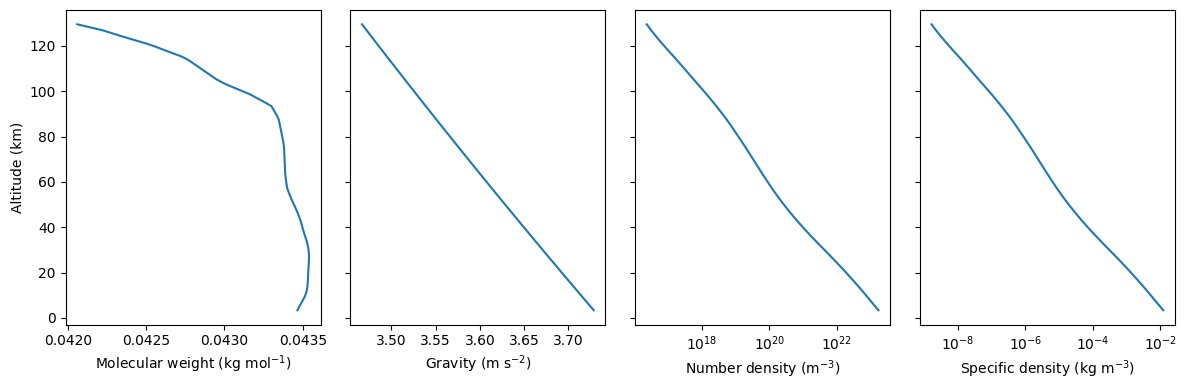

In [10]:
#Performing calculations
#####################################################################

#Molecular weight (based on the molecular weight and vmr of each of the gases)
Atmosphere.calc_molwt()

#Gravity
Atmosphere.calc_grav()
 
#Number density
numdens = Atmosphere.calc_numdens()

#Specific density
rho = Atmosphere.calc_rho()


#Making summary plot
######################################################################

fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(12,4),sharey=True)

ax1.plot(Atmosphere.MOLWT,Atmosphere.H/1.0e3)
ax1.set_xlabel('Molecular weight (kg mol$^{-1}$)')
ax1.set_ylabel('Altitude (km)')

ax2.plot(Atmosphere.GRAV,Atmosphere.H/1.0e3)
ax2.set_xlabel('Gravity (m s$^{-2}$)')

ax3.plot(numdens,Atmosphere.H/1.0e3)
ax3.set_xlabel('Number density (m$^{-3}$)')
ax3.set_xscale('log')
 
ax4.plot(rho,Atmosphere.H/1.0e3)
ax4.set_xlabel('Specific density (kg m$^{-3}$)')
ax4.set_xscale('log')

plt.tight_layout()